**score: 0.79904**
# 0. 기본 설정
* 라이브러리 임포트
* 라이브러리 기초 설정
* 데이터 로드

In [1]:
# 데이터 분석
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# 머신러닝
from sklearn.model_selection import train_test_split

# 기타
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 로드
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')
merge = [df_train, df_test]

# 1. EDA

### 1-1. 데이터 형태 파악

In [3]:
print('훈련 데이터: {}\n테스트 데이터: {}'.format(df_train.shape, df_test.shape))

훈련 데이터: (891, 12)
테스트 데이터: (418, 11)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



* 결측값 있는 컬럼
    * Age컬럼 결측값 100개 이상으로 처리 필요
    * Cabin 컬럼은 결측값이 많음
    * Embarked 컬럼 결측값 2개  
* Age컬럼
    * 1세보다 적을 시 실수(0.64)
    * 추정값일 경우, +0.5

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1-2. Pclass
* 좌석의 클래스
* 범주형

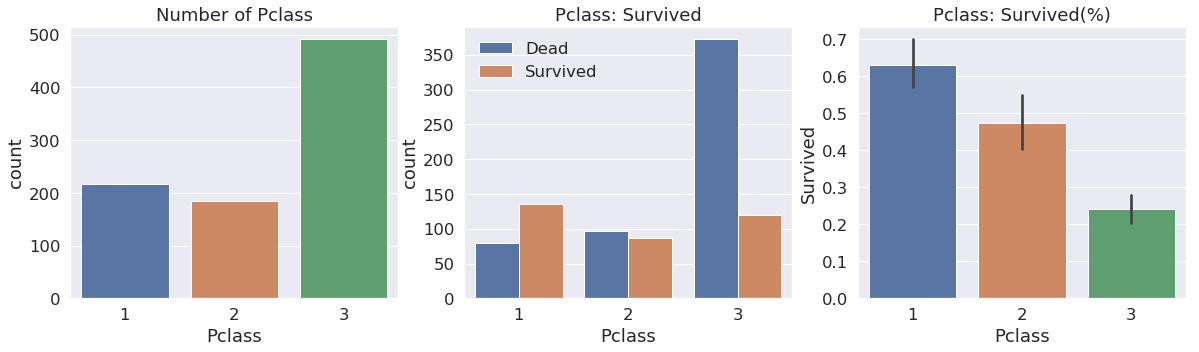

In [6]:
f, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot('Pclass', data=df_train, ax=ax[0])
ax[0].set_title('Number of Pclass')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived')
ax[1].legend(['Dead', 'Survived'])

sns.barplot('Pclass', 'Survived', data=df_train, ax=ax[2])
ax[2].set_title('Pclass: Survived(%)')
plt.show()

* 1st클래스 탑승객은 생존율이 무려 60%
* 3rd클래스 탑승객은 전체 승객 중 절반 이상을 차지했는데, 그 중 생존율은 약 20%
* 클래스가 높아질수록 올라가는 생존율, 생존에도 영향을 미친 자본주의??

### 1-3. Sex

In [7]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Sex: Survived')

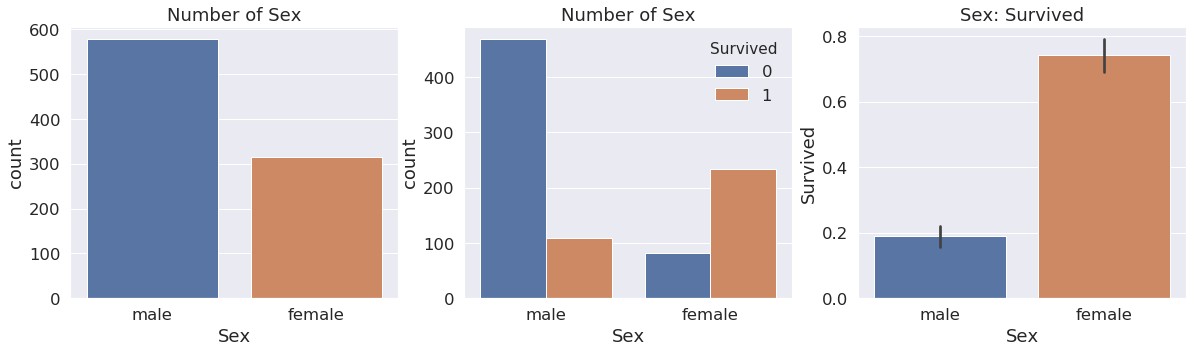

In [8]:
f, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot('Sex', data=df_train, ax=ax[0])
ax[0].set_title('Number of Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Number of Sex')

sns.barplot('Sex', 'Survived', data=df_train, ax=ax[2])
ax[2].set_title('Sex: Survived')

* 남녀 비율은 약 2:1 비율
* 하지만 생존율은 극명하게 차이남
* 성별이 생존유무에 큰 영향을 끼쳤음

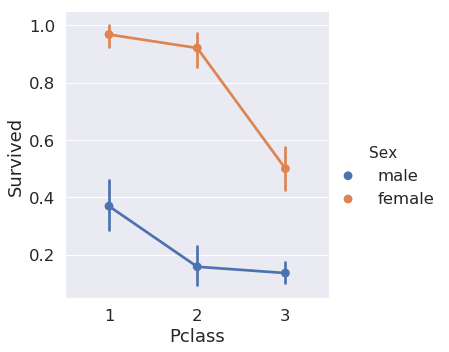

In [9]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train)
plt.show()

* 전반적으로 각 클래스별로 살펴도 여성의 생존율이 남성 생존율보다 높았음
* 다만 3rd클래스는 1,2클래스보다는 다소 떨어짐

### 1-4. Age

In [10]:
df_train['Age'].value_counts().sort_index().index

Float64Index([0.42, 0.67, 0.75, 0.83, 0.92,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,
               7.0,  8.0,  9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 14.5, 15.0, 16.0,
              17.0, 18.0, 19.0, 20.0, 20.5, 21.0, 22.0, 23.0, 23.5, 24.0, 24.5,
              25.0, 26.0, 27.0, 28.0, 28.5, 29.0, 30.0, 30.5, 31.0, 32.0, 32.5,
              33.0, 34.0, 34.5, 35.0, 36.0, 36.5, 37.0, 38.0, 39.0, 40.0, 40.5,
              41.0, 42.0, 43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0,
              51.0, 52.0, 53.0, 54.0, 55.0, 55.5, 56.0, 57.0, 58.0, 59.0, 60.0,
              61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.0, 70.5, 71.0, 74.0,
              80.0],
             dtype='float64')

평균 나이: 29.70세
최고령: 80.00세
최연소: 0.42


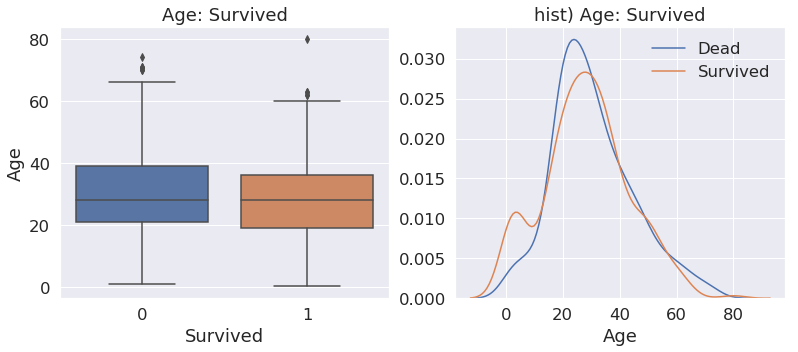

In [11]:
print('평균 나이: {:.2f}세\n최고령: {:.2f}세\n최연소: {:.2f}'.format(df_train['Age'].mean(), df_train['Age'].max(), df_train['Age'].min()))
f, ax = plt.subplots(1,2, figsize=(13, 5))
sns.boxplot('Survived', 'Age', data=df_train, ax=ax[0])
ax[0].set_title('Age: Survived')
sns.kdeplot(df_train['Age'][df_train['Survived']==0], label='Dead', ax=ax[1])
sns.kdeplot(df_train['Age'][df_train['Survived']==1], label='Survived', ax=ax[1])
ax[1].set_title('hist) Age: Survived')
ax[1].set_xlabel('Age')
plt.show()

* 연령 자체만으로는 생존자, 사망자가 크게 구별되지는 않음. 
* 다른 피처를 섞어서 보자

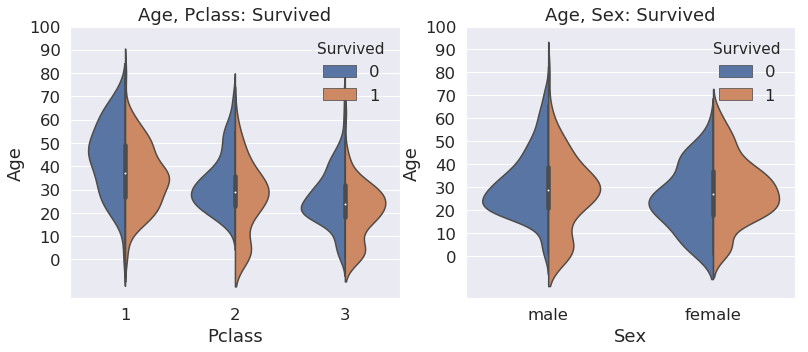

In [12]:
f, ax = plt.subplots(1, 2, figsize=(13, 5))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, split=True, ax=ax[0])
sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, split=True, ax=ax[1])
ax[0].set_title('Age, Pclass: Survived')
ax[1].set_title('Age, Sex: Survived')
for axes in [ax[0], ax[1]]:
    axes.set_yticks(range(0, 110, 10))

* 좋은 Class의 경우 남성 생존율 증가
* 2nd, 3rd클래스에서는 어린 아이들이 많이 탔음. 대부분 생존했음.
* 10대 미만의 아이들 중, 생존율 자체는 남자아이가 더 높았음

### 1-5. SibSp(형제, 배우자), Parch(부모, 자녀)

* 가족의 수를 두 피처로 나눈 것이므로, 하나의 컬럼으로 합치자!

In [13]:
for df in merge:
    df['Familysize'] = df['SibSp'] + df['Parch']
    df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [14]:
df_train['Familysize'] = df_train['Familysize']+1

In [15]:
df_test['Familysize'] = df_test['Familysize']+1

In [16]:
df_train['Familysize'].value_counts().sort_index(ascending=True)

1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: Familysize, dtype: int64

Text(0.5, 1.0, 'Familysize: Survived(%)')

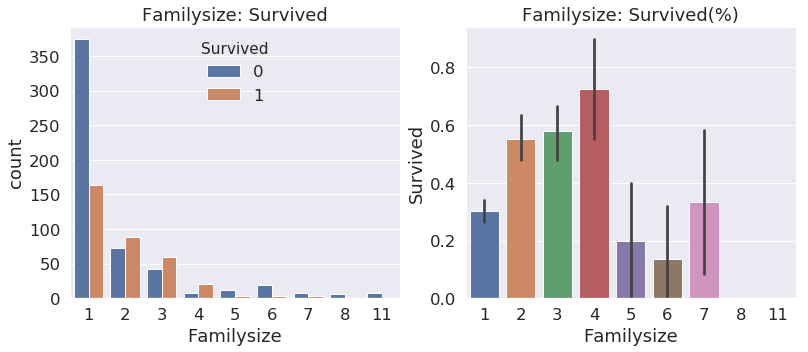

In [17]:
f, ax = plt.subplots(1, 2, figsize=(13,5))
sns.countplot('Familysize', hue='Survived', data=df_train, ax=ax[0])
ax[0].set_title('Familysize: Survived')
sns.barplot('Familysize', 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('Familysize: Survived(%)')

* 혼자 배에 탄 사람이 가장 많았지만, 생존율은 30%가량에 불과
* 가족 수가 2인 이상일 때 생존율 50% 이상
* 혼자 탄 사람은 설마 3rd클래스에 많았나?

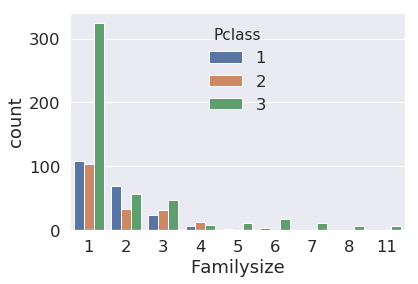

In [18]:
sns.countplot('Familysize', hue='Pclass', data=df_train)

* 혼자 배에 탄 사람 중 3rd 클래스에 탄 사람이 많았음

### 1-6. Fare

(0, 30)

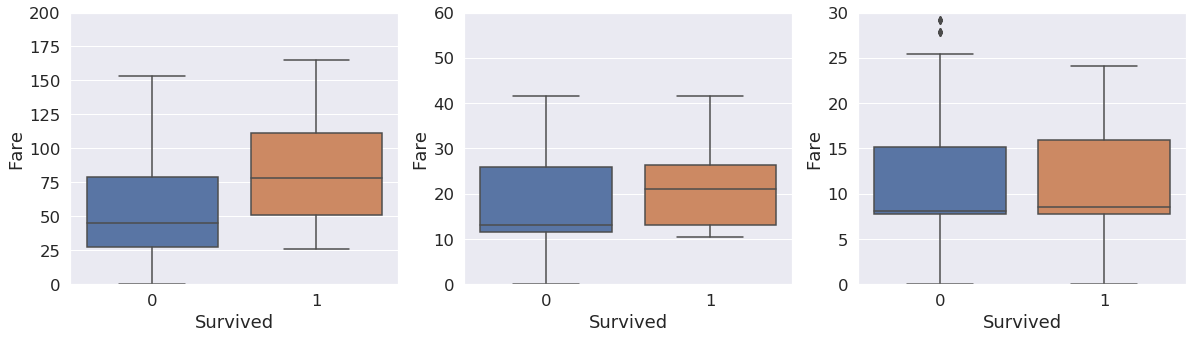

In [19]:
f, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.boxplot('Survived', 'Fare', data=df_train[df_train['Pclass']==1], ax=ax[0])
ax[0].set_ylim(0, 200, 10)
sns.boxplot('Survived', 'Fare', data=df_train[df_train['Pclass']==2], ax=ax[1])
ax[1].set_ylim(0, 60, 10)
sns.boxplot('Survived', 'Fare', data=df_train[df_train['Pclass']==3], ax=ax[2])
ax[2].set_ylim(0, 30, 10)
# sns.swarmplot('Pclass', 'Fare', data=df_train, color='.25', alpha=.3)

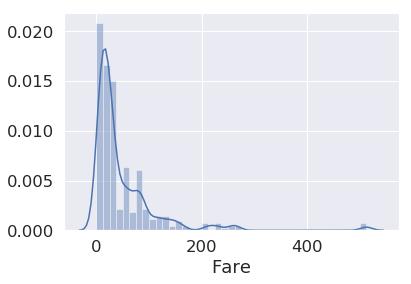

In [20]:
sns.distplot(df_train['Fare'][df_train['Survived']==1])

### 1-7. Cabin

* Drop!

In [21]:
for df in merge:
    df.drop(['Cabin'], axis=1, inplace=True)

### 1-8. Ticket

* Drop!

In [22]:
for df in merge:
    df.drop(['Ticket'], axis=1, inplace=True)

### 1-9. Embarked

In [23]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

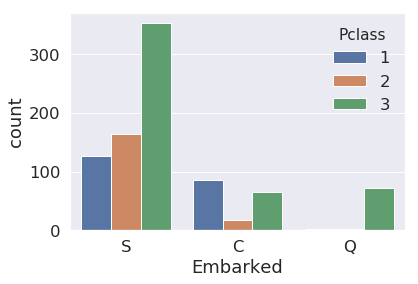

In [24]:
sns.countplot('Embarked', hue='Pclass', data=df_train)

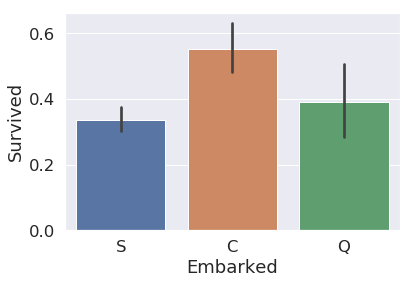

In [25]:
sns.barplot('Embarked', 'Survived', data=df_train)

### 1-10. Name

In [26]:
for df in merge:
    df['Initial'] = df['Name'].str.extract('([a-zA-Z]+)\.')

In [27]:
df_train['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Ms            1
Jonkheer      1
Lady          1
Sir           1
Capt          1
Mme           1
Countess      1
Name: Initial, dtype: int64

In [28]:
for df in merge:
    df['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                           ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

In [29]:
for df in merge:
    df.drop(['Name'], axis=1, inplace=True)

In [30]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,Fare,Familysize
Initial,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,34.703125,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,43.937188,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,24.939822,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,45.420603,2.511811
Other,564.444444,0.111111,1.666667,45.888889,19.102778,1.222222


### 전처리 하고가자! b

* ID 드랍

In [31]:
df_train.drop(['PassengerId'], axis=1, inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize,Initial
0,0,3,male,22.0,7.2500,S,2,Mr
1,1,1,female,38.0,71.2833,C,2,Mrs
2,1,3,female,26.0,7.9250,S,1,Miss
3,1,1,female,35.0,53.1000,S,2,Mrs
4,0,3,male,35.0,8.0500,S,1,Mr


* Fare 스케일링

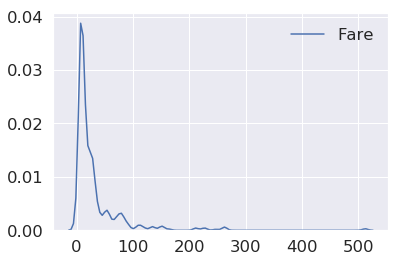

In [32]:
sns.kdeplot(df_train['Fare'])

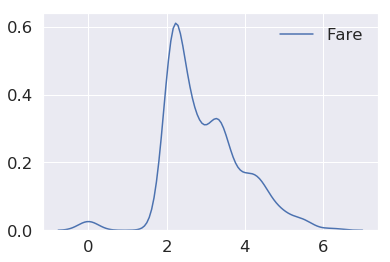

In [33]:
df_train['Fare'] = np.log(df_train['Fare']+1)
df_test['Fare'] = np.log(df_test['Fare']+1)
sns.kdeplot(df_train['Fare'])

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
df_fare = df_train['Fare']
temp = scaler.fit(np.array(df_fare).reshape(-1,1))
df_scaled = scaler.transform(np.array(df_fare).reshape(-1,1))
df_train['Fare'] = df_scaled
df_test['Fare'] = temp.transform(np.array(df_test['Fare']).reshape(-1,1))

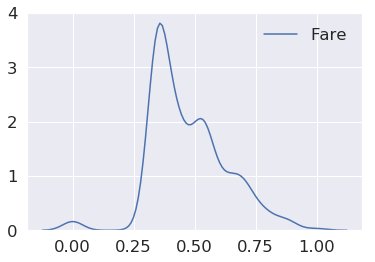

In [36]:
sns.kdeplot(df_train['Fare'])

# 2. Feature engineering

### 2-1. 결측값 처리
* Age, Embarked

1. Age
    * Initial의 평균값으로 치환

In [37]:
for df in merge:
    df.loc[(df['Age'].isnull()) & (df['Initial'] == 'Master'), 'Age'] = 5
    df.loc[(df['Age'].isnull()) & (df['Initial'] == 'Miss'), 'Age'] = 22
    df.loc[(df['Age'].isnull()) & (df['Initial'] == 'Mr'), 'Age'] = 33
    df.loc[(df['Age'].isnull()) & (df['Initial'] == 'Mrs'), 'Age'] = 36
    df.loc[(df['Age'].isnull()) & (df['Initial'] == 'Other'), 'Age'] = 46

2. Embarked
    * 값이 적으므로 최빈값으로 치환

In [38]:
df_train.loc[df_train['Embarked'].isnull(), 'Embarked'] = 'C'

In [39]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize,Initial
0,0,3,male,22.0,0.338125,S,2,Mr
1,1,1,female,38.0,0.685892,C,2,Mrs
2,1,3,female,26.0,0.350727,S,1,Miss
3,1,1,female,35.0,0.639463,S,2,Mrs
4,0,3,male,35.0,0.352955,S,1,Mr


### 2-2. one-hot-encoding

* Pclass, Sex, Embarked, Initial

In [40]:
df_train = pd.get_dummies(df_train, columns=['Pclass', 'Sex', 'Embarked', 'Initial'])
df_test = pd.get_dummies(df_test, columns=['Pclass', 'Sex', 'Embarked', 'Initial'])
    

In [41]:
df_train.head()

,Survived,Age,Fare,Familysize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,0,22.0,0.338125,2,0,0,1,0,1,0,0,1,0,0,1,0,0
1,1,38.0,0.685892,2,1,0,0,1,0,1,0,0,0,0,0,1,0
2,1,26.0,0.350727,1,0,0,1,1,0,0,0,1,0,1,0,0,0
3,1,35.0,0.639463,2,1,0,0,1,0,0,0,1,0,0,0,1,0
4,0,35.0,0.352955,1,0,0,1,0,1,0,0,1,0,0,1,0,0


### 2-3. bining

* Age

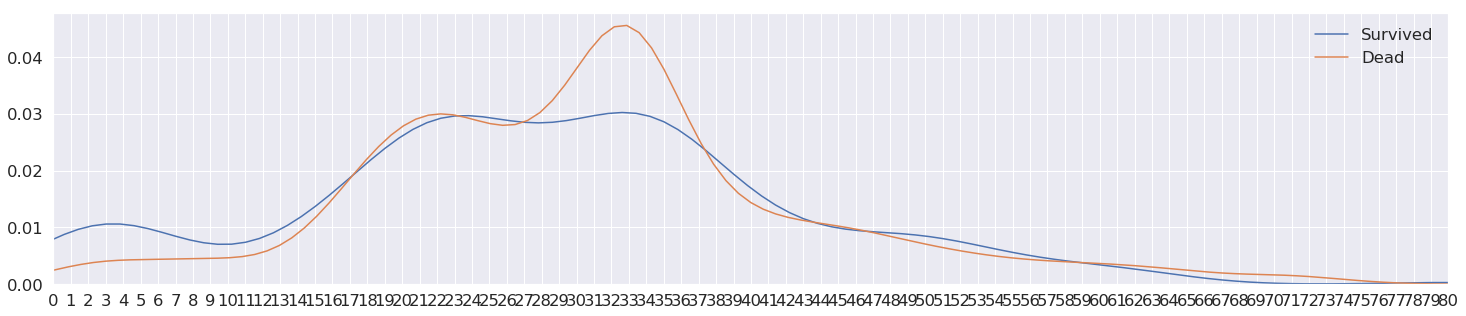

In [42]:
plt.figure(figsize=(25,5))
sns.kdeplot(df_train['Age'][df_train['Survived']==1], label='Survived')
sns.kdeplot(df_train['Age'][df_train['Survived']==0], label='Dead')
plt.xlim(0,80)
plt.xticks(np.linspace(0, 80, 81))
plt.show()

* 0~17세: 0
* 18~27세: 1
* 28~36세: 2
* 37~46세: 3
* 47세 이상: 4

In [43]:
for df in [df_train, df_test]:
    df.loc[df['Age']<=17, 'Age'] = 0,
    df.loc[(df['Age']>17) & (df['Age']<=27) , 'Age'] = 1
    df.loc[(df['Age']>27) & (df['Age']<=36) , 'Age'] = 2
    df.loc[(df['Age']>36) & (df['Age']<=46) , 'Age'] = 3
    df.loc[(df['Age']>46), 'Age'] = 4

In [44]:
df_train

,Survived,Age,Fare,Familysize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,0,1.0,0.338125,2,0,0,1,0,1,0,0,1,0,0,1,0,0
1,1,3.0,0.685892,2,1,0,0,1,0,1,0,0,0,0,0,1,0
2,1,1.0,0.350727,1,0,0,1,1,0,0,0,1,0,1,0,0,0
3,1,2.0,0.639463,2,1,0,0,1,0,0,0,1,0,0,0,1,0
4,0,2.0,0.352955,1,0,0,1,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1.0,0.422864,1,0,1,0,0,1,0,0,1,0,0,0,0,1
887,1,1.0,0.550238,1,1,0,0,1,0,0,0,1,0,1,0,0,0
888,0,1.0,0.512205,4,0,0,1,1,0,0,0,1,0,1,0,0,0
889,1,1.0,0.550238,1,1,0,0,0,1,1,0,0,0,0,1,0,0


# 3. Modeling

In [45]:
X = df_train.iloc[:, 1:]
y = df_train.iloc[:, 0]

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
from sklearn.model_selection import GridSearchCV

### 3-1. kNN Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
param_grid={'n_neighbors': list(range(1, 30))}
scores = cross_val_score(GridSearchCV(clf, param_grid, cv=kfold), X_train, y_train, cv=kfold)
print('scores:\n{}\n - - - - - - - - - -\nㅣ score_mean: {:.2f} ㅣ\n - - - - - - - - - -'.format(scores, scores.mean()*100))

NameError: name 'X_train' is not defined

### 3-2. Rogistic Regressor

In [48]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
scores = cross_val_score(GridSearchCV(clf, param_grid, cv=kfold), X_train, y_train, cv=kfold)
print('scores:\n{}\n - - - - - - - - - -\nㅣ score_mean: {:.2f} ㅣ\n - - - - - - - - - -'.format(scores, scores.mean()*100))

NameError: name 'X_train' is not defined

### 3-3. SVM

In [49]:
# from sklearn.svm import SVC
# clf = SVC()
# param_grid={'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}
# scores = cross_val_score(GridSearchCV(clf, param_grid, cv=kfold), X_train, y_train, cv=kfold)
# print('scores:\n{}\n - - - - - - - - - -\nㅣ score_mean: {:.2f} ㅣ\n - - - - - - - - - -'.format(scores, scores.mean()*100))

In [50]:
from sklearn.svm import SVC
clf = SVC(C=10,gamma=.1)
scores = cross_val_score(clf, X_train, y_train, cv=kfold)
print('scores:\n{}\n - - - - - - - - - -\nㅣ score_mean: {:.2f} ㅣ\n - - - - - - - - - -'.format(scores, scores.mean()*100))

NameError: name 'X_train' is not defined

### 3-4. Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=kfold)
print('scores:\n{}\n - - - - - - - - - -\nㅣ score_mean: {:.2f} ㅣ\n - - - - - - - - - -'.format(scores, scores.mean()*100))

scores:
[0.78888889 0.78651685 0.82022472 0.76404494 0.80898876 0.79775281
 0.82022472 0.82022472 0.71910112 0.82022472]
 - - - - - - - - - -
ㅣ score_mean: 79.46 ㅣ
 - - - - - - - - - -


### 3-6. Naive Bayse

In [52]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
scores = cross_val_score(clf, X, y, cv=kfold)
print('scores:\n{}\n - - - - - - - - - -\nㅣ score_mean: {:.2f} ㅣ\n - - - - - - - - - -'.format(scores, scores.mean()*100))

scores:
[0.81111111 0.78651685 0.58426966 0.7752809  0.76404494 0.78651685
 0.7752809  0.84269663 0.78651685 0.84269663]
 - - - - - - - - - -
ㅣ score_mean: 77.55 ㅣ
 - - - - - - - - - -


### 3-6. RandomForest

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=kfold)
print('scores:\n{}\n - - - - - - - - - -\nㅣ score_mean: {:.2f} ㅣ\n - - - - - - - - - -'.format(scores, scores.mean()*100))

scores:
[0.78888889 0.84269663 0.80898876 0.78651685 0.83146067 0.79775281
 0.82022472 0.83146067 0.75280899 0.82022472]
 - - - - - - - - - -
ㅣ score_mean: 80.81 ㅣ
 - - - - - - - - - -


### 3-7. GradientBoosting

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=30, learning_rate=1)
scores = cross_val_score(clf, X, y, cv=kfold)
print('scores:\n{}\n - - - - - - - - - -\nㅣ score_mean: {:.2f} ㅣ\n - - - - - - - - - -'.format(scores, scores.mean()*100))

scores:
[0.81111111 0.86516854 0.79775281 0.80898876 0.82022472 0.82022472
 0.83146067 0.85393258 0.78651685 0.86516854]
 - - - - - - - - - -
ㅣ score_mean: 82.61 ㅣ
 - - - - - - - - - -


# 4. Submission

In [55]:
clf = SVC(C=10, gamma=.1)
clf.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
clf.score(X, y)

0.8507295173961841

In [57]:
test = df_test.drop('PassengerId', axis=1).copy()
test.loc[152, 'Fare'] = 0
df_test.head()

,PassengerId,Age,Fare,Familysize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,892,2.0,0.348997,1,0,0,1,0,1,0,1,0,0,0,1,0,0
1,893,4.0,0.333195,2,0,0,1,1,0,0,0,1,0,0,0,1,0
2,894,4.0,0.379604,1,0,1,0,0,1,0,1,0,0,0,1,0,0
3,895,1.0,0.363449,1,0,0,1,0,1,0,0,1,0,0,1,0,0
4,896,1.0,0.414494,3,0,0,1,1,0,0,0,1,0,0,0,1,0


In [58]:
test
prediction = clf.predict(test)

In [59]:
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'], 
    'Survived': prediction
                          })

In [61]:
submission.to_csv('submission.csv', index=False)

In [62]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
